In [6]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.stats import chisquare
from scipy.stats import kruskal
import scikit_posthocs
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier

In [7]:
df = pd.read_excel(r"C:\Users\rayde\Desktop\DSI_kickstarterscrape_dataset.xlsx", parse_dates=['funded date'])

C:\Users\rayde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


In [8]:
df.columns

Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration'],
      dtype='object')

In [9]:
df.describe()

,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.080800e+09,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,6.218057e+08,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,5.438962e+08,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,1.078345e+09,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,1.621596e+09,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


In [10]:
df.fillna(value=np.nan, inplace=True)

## Browse Duplicates

In [11]:
bool_filter = df['project id'].duplicated() == True
values = list(df['project id'][bool_filter].values)
df[df['project id'].isin(values)].sort_values('project id')

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
45651,2140333236,Imagined Family Heirlooms: An Archive of Inher...,http://www.kickstarter.com/projects/andersonst...,Photography,Photography,"Little Rock, AR",successful,5800.0,8521.0,1.469138,110,2011-07-29 00:53:53+00:00,16,"$10,$20,$35,$50,$75,$100,$150,$200,$225,$300,$...",5,4,67.00
45652,2140333236,Imagined Family Heirlooms: An Archive of Inher...,http://www.kickstarter.com/projects/andersonst...,Photography,Photography,"Little Rock, AR",successful,5800.0,8521.0,1.469138,110,2011-07-29 00:53:53+00:00,16,"$10,$20,$35,$50,$75,$100,$150,$200,$225,$300,$...",5,4,67.00
45653,2140344109,Help Fund Thana Alexa's Debut Album &quot;Ode ...,http://www.kickstarter.com/projects/1024906052...,Music,Jazz,"New York, NY",successful,15000.0,16678.0,1.111867,142,2012-05-20 20:36:57+00:00,16,"$1,$5,$10,$15,$25,$50,$75,$100,$200,$250,$300,...",5,2,32.00
45654,2140344109,Help Fund Thana Alexa's Debut Album &quot;Ode ...,http://www.kickstarter.com/projects/1024906052...,Music,Jazz,"New York, NY",successful,15000.0,16678.0,1.111867,142,2012-05-20 20:36:57+00:00,16,"$1,$5,$10,$15,$25,$50,$75,$100,$200,$250,$300,...",5,2,32.00
45655,2140513451,The Cookie Chew - Changing the Way We Eat a Co...,http://www.kickstarter.com/projects/1650956569...,Food,Food,"San Diego, CA",successful,4500.0,5540.0,1.231111,89,2010-08-24 04:43:00+00:00,5,"$10,$50,$75,$100,$500",14,17,43.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45930,2146435917,Making Mama(s) Proud: The 2011 &quot;Donna/Mad...,http://www.kickstarter.com/projects/johnpaulka...,Theater,Theater,"Los Angeles, CA",successful,5000.0,5390.0,1.078000,86,2011-06-04 08:56:58+00:00,8,"$1,$10,$25,$50,$100,$200,$500,$1,000",5,1,30.00
45931,2146437406,The Production of Erasure,http://www.kickstarter.com/projects/295025953/...,Photography,Photography,"Brooklyn, NY",successful,1200.0,1220.0,1.016667,17,2011-03-03 04:09:38+00:00,6,"$15,$25,$50,$100,$200,$500",1,0,30.00
45932,2146437406,The Production of Erasure,http://www.kickstarter.com/projects/295025953/...,Photography,Photography,"Brooklyn, NY",successful,1200.0,1220.0,1.016667,17,2011-03-03 04:09:38+00:00,6,"$15,$25,$50,$100,$200,$500",1,0,30.00
45933,2146534146,CALLING on ANGELS - not FOR KIDS ONLY!,http://www.kickstarter.com/projects/callingona...,Film &amp; Video,Film &amp; Video,"Burbank, CA",failed,10000.0,250.0,0.025000,1,2011-09-10 19:00:47+00:00,11,"$10,$25,$50,$75,$100,$150,$250,$500,$1,000,$1,...",0,0,60.00


In [12]:
df[df['project id'].duplicated(keep=False)].sort_values(by='project id').head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
45651,2140333236,Imagined Family Heirlooms: An Archive of Inher...,http://www.kickstarter.com/projects/andersonst...,Photography,Photography,"Little Rock, AR",successful,5800.0,8521.0,1.469138,110,2011-07-29 00:53:53+00:00,16,"$10,$20,$35,$50,$75,$100,$150,$200,$225,$300,$...",5,4,67.00
45652,2140333236,Imagined Family Heirlooms: An Archive of Inher...,http://www.kickstarter.com/projects/andersonst...,Photography,Photography,"Little Rock, AR",successful,5800.0,8521.0,1.469138,110,2011-07-29 00:53:53+00:00,16,"$10,$20,$35,$50,$75,$100,$150,$200,$225,$300,$...",5,4,67.00
45653,2140344109,Help Fund Thana Alexa's Debut Album &quot;Ode ...,http://www.kickstarter.com/projects/1024906052...,Music,Jazz,"New York, NY",successful,15000.0,16678.0,1.111867,142,2012-05-20 20:36:57+00:00,16,"$1,$5,$10,$15,$25,$50,$75,$100,$200,$250,$300,...",5,2,32.00
45654,2140344109,Help Fund Thana Alexa's Debut Album &quot;Ode ...,http://www.kickstarter.com/projects/1024906052...,Music,Jazz,"New York, NY",successful,15000.0,16678.0,1.111867,142,2012-05-20 20:36:57+00:00,16,"$1,$5,$10,$15,$25,$50,$75,$100,$200,$250,$300,...",5,2,32.00
45655,2140513451,The Cookie Chew - Changing the Way We Eat a Co...,http://www.kickstarter.com/projects/1650956569...,Food,Food,"San Diego, CA",successful,4500.0,5540.0,1.231111,89,2010-08-24 04:43:00+00:00,5,"$10,$50,$75,$100,$500",14,17,43.27


## Drop Duplicates on Project Id / Drop Cancelled or Live Projects

In [13]:
new_df = df.drop_duplicates(subset=['project id'])
new_df = new_df.query('status == "successful" | status =="failed"')

In [14]:
new_df['status'].unique()

array(['successful', 'failed'], dtype=object)

## Fix inconsistent data entry / importation errors

In [15]:
new_df.subcategory.unique()

array(['Short Film', 'Board & Card Games', 'Documentary', 'Fashion',
       'Music', 'Illustration', 'Open Software', 'Indie Rock', 'Dance',
       'Fiction', 'Nonfiction', 'Film &amp; Video', 'Theater', 'Games',
       'Art Book', 'Animation', 'Country & Folk', 'Comics', 'Webseries',
       'Technology', 'Performance Art', 'Narrative Film', 'Video Games',
       'Product Design', 'Painting', 'Photography', 'Conceptual Art',
       'Rock', 'Jazz', 'Classical Music', 'Food', 'Art', 'Pop',
       'Journalism', 'Poetry', 'World Music', 'Sculpture', 'Publishing',
       'Electronic Music', "Children's Book", 'Open Hardware',
       'Graphic Design', 'Hip-Hop', 'Public Art', 'Mixed Media',
       'Periodical', 'Crafts', 'Design', 'Digital Art',
       'Board &amp; Card Games', 'Country &amp; Folk'], dtype=object)

In [16]:
new_df.category.unique()

array(['Film & Video', 'Games', 'Fashion', 'Music', 'Art', 'Technology',
       'Dance', 'Publishing', 'Theater', 'Comics', 'Design',
       'Photography', 'Food', 'Film &amp; Video'], dtype=object)

In [17]:
new_df = new_df.replace(to_replace="Film &amp; Video", value="Film & Video")
new_df = new_df.replace(to_replace='Board &amp; Card Games', value="Board & Card Games")
new_df = new_df.replace(to_replace='Country &amp; Folk', value="Country & Folk")

In [18]:
new_df.subcategory.unique()

array(['Short Film', 'Board & Card Games', 'Documentary', 'Fashion',
       'Music', 'Illustration', 'Open Software', 'Indie Rock', 'Dance',
       'Fiction', 'Nonfiction', 'Film & Video', 'Theater', 'Games',
       'Art Book', 'Animation', 'Country & Folk', 'Comics', 'Webseries',
       'Technology', 'Performance Art', 'Narrative Film', 'Video Games',
       'Product Design', 'Painting', 'Photography', 'Conceptual Art',
       'Rock', 'Jazz', 'Classical Music', 'Food', 'Art', 'Pop',
       'Journalism', 'Poetry', 'World Music', 'Sculpture', 'Publishing',
       'Electronic Music', "Children's Book", 'Open Hardware',
       'Graphic Design', 'Hip-Hop', 'Public Art', 'Mixed Media',
       'Periodical', 'Crafts', 'Design', 'Digital Art'], dtype=object)

In [19]:
new_df.category.unique()

array(['Film & Video', 'Games', 'Fashion', 'Music', 'Art', 'Technology',
       'Dance', 'Publishing', 'Theater', 'Comics', 'Design',
       'Photography', 'Food'], dtype=object)

In [20]:
new_df['name'] = new_df.name.str.replace("&quot;", '"')

In [21]:
new_df.name.iloc[4]

'Dinner Party - a short film about friendship... and revenge'

# Identify outliers in potential outcome variables

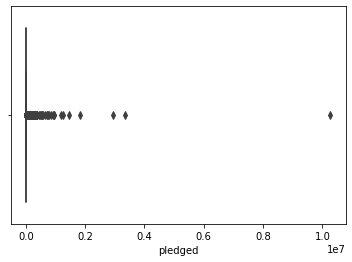

In [22]:
sns.boxplot(x=df['pledged'])

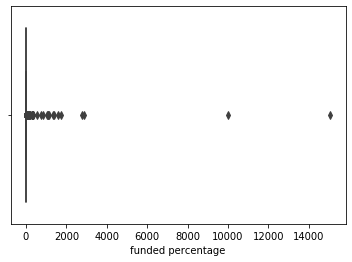

In [23]:
sns.boxplot(x=df['funded percentage'])

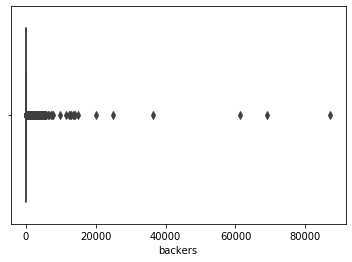

In [24]:
sns.boxplot(x=df['backers'])

In [25]:
df['pledged'].sort_values(ascending=False)

10710    10266845.0
41151     3336372.0
42674     2933252.0
11231     1836447.0
35458     1464706.0
            ...    
34274           NaN
35032           NaN
40759           NaN
40872           NaN
44132           NaN
Name: pledged, Length: 45957, dtype: float64

In [26]:
drop_columns = df['pledged'].sort_values(ascending=False).head(3).index
df.drop(drop_columns, axis=0, inplace=True)
df['pledged'].sort_values(ascending=False)

11231    1836447.0
35458    1464706.0
4086     1254120.0
17468    1192793.0
4114      942578.0
           ...    
34274          NaN
35032          NaN
40759          NaN
40872          NaN
44132          NaN
Name: pledged, Length: 45954, dtype: float64

In [27]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

project id           1.077617e+09
goal                 8.050000e+03
pledged              3.964750e+03
funded percentage    1.071608e+00
backers              5.400000e+01
levels               5.000000e+00
updates              6.000000e+00
comments             3.000000e+00
duration             1.839000e+01
dtype: float64


In [28]:
df[['pledged', 'funded percentage', 'backers']][(df[['pledged', 'funded percentage', 'backers']] < (Q1 - 1.5 * IQR)) |(df[['pledged', 'funded percentage', 'backers']] > (Q3 + 1.5 * IQR))]

C:\Users\rayde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.
C:\Users\rayde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,pledged,funded percentage,backers
0,11545.0,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
45952,NaN,NaN,NaN
45953,NaN,NaN,NaN
45954,NaN,NaN,NaN
45955,NaN,NaN,NaN


In [29]:
for each in ['funded percentage','backers']:
    df[f'z_{each}'] = np.abs(stats.zscore(df[each]))

In [30]:
drop_columns = df[df['z_funded percentage']> 3].sort_values('z_funded percentage', ascending=False).index
df.drop(drop_columns, axis=0, inplace=True)

In [31]:
drop_columns = df[df['z_backers']> 3].sort_values('z_backers', ascending=False).head(3).index
df.drop(drop_columns, axis=0, inplace=True)
df[df['z_backers']> 3].sort_values('z_backers', ascending=False).head(3)

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration,z_funded percentage,z_backers
4086,193329107,The Order of the Stick Reprint Drive,http://www.kickstarter.com/projects/599092525/...,Comics,Comics,"Philadelphia, PA",successful,57750.0,1254120.0,21.716365,14952,2012-02-21 17:03:01+00:00,64,"$10,$11,$12,$14,$14,$15,$16,$24,$25,$26,$29,$3...",40,19311,30.0,0.224521,42.192540
44587,2091726955,Make Leisure Suit Larry come again!,http://www.kickstarter.com/projects/leisuresui...,Games,Video Games,"Austin, TX",successful,500000.0,655183.0,1.310365,14081,2012-05-02 16:30:08+00:00,21,"$5,$15,$25,$40,$50,$75,$100,$150,$250,$500,$75...",24,4985,30.0,0.006073,39.723922
27726,1304249523,Yogventures!,http://www.kickstarter.com/projects/winterkewl...,Games,Video Games,"Los Angeles, CA",successful,250000.0,567665.0,2.270660,13647,2012-05-06 19:23:29+00:00,12,"$15,$25,$30,$60,$90,$200,$300,$500,$750,$2,000...",10,7409,30.0,0.004779,38.493864


## Create new features out of funded date and location

In [62]:
new_df['duration_td'] = new_df.duration.apply(lambda x: datetime.timedelta(days=x))
new_df[['duration','duration_td']].dtypes

duration               float64
duration_td    timedelta64[ns]
dtype: object

In [63]:
new_df['Posting_Date'] = new_df['funded date'] - new_df['duration_td']
new_df[['Posting_Date','duration','duration_td', 'funded date']].head()

,Posting_Date,duration,duration_td,funded date
0,2011-07-20 19:28:17+00:00,30.00,30 days 00:00:00,2011-08-19 19:28:17+00:00
1,2010-06-15 23:39:48+00:00,47.18,47 days 04:19:12,2010-08-02 03:59:00+00:00
3,2012-03-06 20:57:12+00:00,32.22,32 days 05:16:48,2012-04-08 02:14:00+00:00
4,2011-05-02 15:25:39+00:00,30.00,30 days 00:00:00,2011-06-01 15:25:39+00:00
5,2011-06-01 03:13:48+00:00,21.43,21 days 10:19:12,2011-06-22 13:33:00+00:00


In [64]:
new_df['year_funded'] = new_df['funded date'].dt.year
new_df['month_funded'] = new_df['funded date'].dt.month
new_df['day_funded'] = new_df['funded date'].dt.day
new_df['time_funded'] = new_df['funded date'].dt.time
new_df['dayOfWeek_funded'] = new_df['funded date'].dt.dayofweek
new_df[['year_funded','month_funded', 'day_funded', 'time_funded', 'dayOfWeek_funded']]

,year_funded,month_funded,day_funded,time_funded,dayOfWeek_funded
0,2011,8,19,19:28:17,4
1,2010,8,2,03:59:00,0
3,2012,4,8,02:14:00,6
4,2011,6,1,15:25:39,2
5,2011,6,22,13:33:00,2
...,...,...,...,...,...
45952,2012,3,30,13:57:00,4
45953,2012,4,22,02:12:10,6
45954,2012,1,16,05:00:00,0
45955,2012,5,19,19:44:47,5


In [65]:
new_df['year_posted'] = new_df['Posting_Date'].dt.year
new_df['month_posted'] = new_df['Posting_Date'].dt.month
new_df['day_posted'] = new_df['Posting_Date'].dt.day
new_df['time_posted'] = new_df['Posting_Date'].dt.time
new_df['dayOfWeek_posted'] = new_df['Posting_Date'].dt.dayofweek
new_df[['year_posted','month_posted', 'day_posted', 'time_posted', 'dayOfWeek_posted']]

,year_posted,month_posted,day_posted,time_posted,dayOfWeek_posted
0,2011,7,20,19:28:17,2
1,2010,6,15,23:39:48,1
3,2012,3,6,20:57:12,1
4,2011,5,2,15:25:39,0
5,2011,6,1,03:13:48,2
...,...,...,...,...,...
45952,2012,2,21,18:01:48,1
45953,2012,2,22,03:09:46,2
45954,2011,12,19,21:19:12,0
45955,2012,4,19,19:44:47,3


In [66]:
new_df['city'], new_df['state'] = new_df['location'].str.split(', ', 1).str
new_df[['city', 'state', 'location']]

C:\Users\rayde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,city,state,location
0,Columbia,MO,"Columbia, MO"
1,Maplewood,NJ,"Maplewood, NJ"
3,Los Angeles,CA,"Los Angeles, CA"
4,Novi,MI,"Novi, MI"
5,Portland,OR,"Portland, OR"
...,...,...,...
45952,Austin,TX,"Austin, TX"
45953,Los Angeles,CA,"Los Angeles, CA"
45954,Los Angeles,CA,"Los Angeles, CA"
45955,Vero Beach,FL,"Vero Beach, FL"


In [67]:
new_df['city'].unique()

array(['Columbia', 'Maplewood', 'Los Angeles', ..., 'Peaks',
       'Lumberville', 'Lake Oswego'], dtype=object)

In [68]:
new_df['state'].unique()

array(['MO', 'NJ', 'CA', 'MI', 'OR', 'TN', 'IL', nan, 'NY', 'DC', 'ID',
       'FL', 'TX', 'CO', 'ME', 'Taiwan', 'IN', 'Norway', 'MN', 'NC', 'MA',
       'PA', 'CT', 'Chile', 'MD', 'HI', 'VA', 'WA', 'AZ', 'OH', 'NV',
       'Haiti', 'GA', 'AL', 'UT', 'Canada', 'LA', 'SC', 'Ecuador', 'WI',
       'Jamaica', 'Argentina', 'Hong Kong', 'Germany', 'NM', 'NE',
       'Guatemala', 'IA', 'WY', 'Australia', 'RI', 'Sweden', 'OK', 'DE',
       'South Africa', 'AK', 'WV', 'Nepal', 'MT', 'KY', 'VT', 'Kenya',
       'Bosnia and Herzegovina', 'Iceland', 'Mexico', 'KS', 'Hungary',
       'Indonesia', 'China', 'SD', 'Cuba', 'Peru', 'Italy', 'Netherlands',
       'Singapore', 'Ethiopia', 'NH', 'New Zealand', 'France',
       'United Kingdom', 'Austria', 'Turkey', 'AR', 'Mt', 'Congo',
       'Colombia', 'India', 'Mongolia', 'MS', 'Israel', 'Dominica',
       'Finland', 'Czech Republic', 'Japan', 'Virgin Islands, U.S.',
       'Lebanon', 'Armenia', 'Portugal', 'Qatar', 'Morocco', 'Martinique',
       'Pue

In [69]:
new_df = new_df.replace(to_replace='Virginia', value="VA")

In [70]:
x, y = new_df[new_df.state == 'Middleburg, MD']['state'].str.split(', ', 1).str
row_val = list(new_df[new_df.state == 'Middleburg, MD'].index)[0]

new_df.loc[[row_val],['city']] = x
new_df.loc[[row_val], ['state']]= y
new_df.loc[row_val]

C:\Users\rayde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


project id                                                   1637912974
name                                                         Light Ball
url                   http://www.kickstarter.com/projects/819627388/...
category                                                     Technology
subcategory                                                  Technology
location                                             10, Middleburg, MD
status                                                           failed
goal                                                            19500.0
pledged                                                           103.0
funded percentage                                              0.005282
backers                                                               3
funded date                                   2012-03-31 03:59:00+00:00
levels                                                                6
reward levels                          $25,$100,$200,$750,$2,000

In [71]:
new_df['country'] = new_df['state'].replace(to_replace=r'^..{1}$', value="USA", regex=True)
new_df[new_df.country != 'USA'].head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,...,category_dummy,subcategory_dummy,status_dummy,year_posted_dummy,year_funded_dummy,month_posted_dummy,month_funded_dummy,country_dummy,year_month_posted,year_month_funded
11,727286,Offline Wikipedia iPhone app,http://www.kickstarter.com/projects/dphiffer/o...,Technology,Open Software,NaN,successful,99.0,145.0,1.464646,...,11,31,1,0,0,3,6,54,2,4
14,893085,Esperanza Farm: A Novel,http://www.kickstarter.com/projects/JesusMaria...,Publishing,Fiction,NaN,failed,6500.0,765.0,0.117692,...,10,16,0,1,1,4,6,54,15,16
29,1512678,Eyes and Ears on English - comedy/English educ...,http://www.kickstarter.com/projects/1787808582...,Film & Video,Film & Video,"Taipei, Taiwan",failed,12000.0,1502.0,0.125167,...,5,17,0,2,2,3,4,37,26,26
42,2117470,""" Hugo's There "" - Real News. Unbelievably.",http://www.kickstarter.com/projects/mastermind...,Film & Video,Webseries,"Oslo, Norway",failed,8400.0,25.0,0.002976,...,5,47,0,2,2,6,8,37,29,30
49,2442649,Dream with Me--A documentary about one year in...,http://www.kickstarter.com/projects/1800556280...,Film & Video,Documentary,NaN,successful,5000.0,5615.0,1.123000,...,5,13,1,0,0,8,9,54,7,7


In [72]:
series_1 = new_df[new_df.country != 'USA']['state'].apply(lambda x: np.nan)
indices= list(new_df[new_df.country != 'USA'].index)
new_df.loc[indices, ['state']] = series_1

In [73]:
new_df['state'].unique()

array(['MO', 'NJ', 'CA', 'MI', 'OR', 'TN', 'IL', nan, 'NY', 'DC', 'ID',
       'FL', 'TX', 'CO', 'ME', 'IN', 'MN', 'NC', 'MA', 'PA', 'CT', 'MD',
       'HI', 'VA', 'WA', 'AZ', 'OH', 'NV', 'GA', 'AL', 'UT', 'LA', 'SC',
       'WI', 'NM', 'NE', 'IA', 'WY', 'RI', 'OK', 'DE', 'AK', 'WV', 'MT',
       'KY', 'VT', 'KS', 'SD', 'NH', 'AR', 'Mt', 'MS', 'ND'], dtype=object)

In [74]:
new_df['country'].unique()

array(['USA', nan, 'Taiwan', 'Norway', 'Chile', 'Haiti', 'Canada',
       'Ecuador', 'Jamaica', 'Argentina', 'Hong Kong', 'Germany',
       'Guatemala', 'Australia', 'Sweden', 'South Africa', 'Nepal',
       'Kenya', 'Bosnia and Herzegovina', 'Iceland', 'Mexico', 'Hungary',
       'Indonesia', 'China', 'Cuba', 'Peru', 'Italy', 'Netherlands',
       'Singapore', 'Ethiopia', 'New Zealand', 'France', 'United Kingdom',
       'Austria', 'Turkey', 'Congo', 'Colombia', 'India', 'Mongolia',
       'Israel', 'Dominica', 'Finland', 'Czech Republic', 'Japan',
       'Virgin Islands, U.S.', 'Lebanon', 'Armenia', 'Portugal', 'Qatar',
       'Morocco', 'Martinique', 'Puerto Rico', 'Afghanistan', 'Denmark',
       'Tanzania', 'Kazakhstan', 'Zambia', 'Switzerland', 'Egypt',
       'Svalbard and Jan Mayen', 'Liberia', 'Ghana', 'Nicaragua',
       'Russia', 'Ukraine', 'Bulgaria', 'South Korea', 'Brazil', 'Rwanda',
       'Spain', 'Costa Rica', 'Philippines', 'Pakistan', 'El Salvador',
       'Panama', 

In [75]:
new_df['country'] = new_df['country'].astype('str')
new_df[new_df.country == 'nan'][['location', 'country']].head()

,location,country
11,NaN,nan
14,NaN,nan
49,NaN,nan
98,NaN,nan
100,NaN,nan


In [76]:
series1 = new_df[new_df['country']=='nan']['country'].apply(lambda x: np.nan)
indices = series1.index
new_df.loc[indices, ['country']] = series_1

In [77]:
new_df.loc[indices, ['country']].head()

,country
11,NaN
14,NaN
49,NaN
98,NaN
100,NaN


## Create Dummy Variables Using LabelEncoder()

In [78]:
obj_cols = ['category', 'subcategory', 'status', 'year_posted', 'year_funded', 'month_posted', 'month_funded']
label_encoder = LabelEncoder()
for col in obj_cols:
    try:
        new_df[col+"_dummy"] = label_encoder.fit_transform(new_df[col])
    except:
        print('problem with' + col)

In [79]:
countries = new_df.country
country_counts = countries.value_counts()

mask = countries.isin(country_counts[country_counts < 10].index)

# Label all other categories as Other
countries[mask] = 'Other'

# Print the updated category counts
print(pd.value_counts(countries))

USA               38420
Other               312
Canada              264
United Kingdom      191
Germany             103
Mexico               78
France               75
Italy                71
India                66
China                57
Australia            52
Israel               44
Japan                44
South Africa         41
Spain                32
Brazil               32
Haiti                32
Czech Republic       30
Peru                 26
Iceland              26
Netherlands          25
Argentina            25
Puerto Rico          24
Thailand             23
Kenya                21
Guatemala            21
Austria              19
Turkey               19
Egypt                19
New Zealand          19
Sweden               19
Indonesia            18
Colombia             17
Nepal                16
Denmark              15
Afghanistan          14
Ecuador              14
Chile                14
Uganda               13
Ghana                13
South Korea          13
Cambodia        

C:\Users\rayde\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [80]:
new_df['country'] = new_df['country'].astype('str')
new_df.country
new_df['country_dummy'] = label_encoder.fit_transform(new_df['country'])

In [81]:
new_df.country_dummy

0        51
1        51
3        51
4        51
5        51
         ..
45952    51
45953    51
45954    51
45955    51
45956    51
Name: country_dummy, Length: 41841, dtype: int32

In [82]:
new_df.describe()

,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration,duration_td,...,category_dummy,subcategory_dummy,status_dummy,year_posted_dummy,year_funded_dummy,month_posted_dummy,month_funded_dummy,country_dummy,year_month_posted,year_month_funded
count,4.184100e+04,4.184100e+04,4.184100e+04,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841,...,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000
mean,1.078276e+09,1.041084e+04,5.128665e+03,1.980354,71.098731,7.950646,4.335580,8.327287,40.232153,40 days 05:34:17.990965799,...,6.258072,26.105423,0.547358,2.025501,2.123205,4.918358,5.079993,49.872493,26.054994,26.390956
std,6.197736e+08,1.480363e+05,5.916179e+04,92.728555,713.994952,4.192497,6.628569,175.451017,17.786219,17 days 18:52:09.326775168,...,3.160544,13.910777,0.497758,0.754904,0.744352,3.488458,3.331319,6.445682,8.005827,7.909144
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1 days 00:00:00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.426141e+08,1.650000e+03,2.200000e+02,0.051667,5.000000,5.000000,0.000000,0.000000,30.000000,30 days 00:00:00,...,5.000000,14.000000,0.000000,2.000000,2.000000,2.000000,2.000000,51.000000,21.000000,22.000000
50%,1.077801e+09,4.000000e+03,1.450000e+03,1.005167,25.000000,7.000000,2.000000,1.000000,32.080000,32 days 01:55:12,...,6.000000,27.000000,1.000000,2.000000,2.000000,4.000000,4.000000,51.000000,27.000000,28.000000
75%,1.616992e+09,8.800000e+03,4.400000e+03,1.130000,61.000000,10.000000,6.000000,3.000000,49.080000,49 days 01:55:12,...,8.000000,41.000000,1.000000,3.000000,3.000000,8.000000,8.000000,51.000000,33.000000,33.000000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.000000,19311.000000,91.960000,91 days 23:02:24,...,12.000000,48.000000,1.000000,3.000000,3.000000,11.000000,11.000000,54.000000,37.000000,37.000000


In [83]:
#create interaction between month and year
new_df['year_month_posted'] = new_df['year_posted'].astype('str') + "_" + new_df['month_posted_dummy'].astype('str')
new_df['year_month_posted'] = label_encoder.fit_transform(new_df['year_month_posted'])
new_df['year_month_posted'].describe()

count    41841.000000
mean        26.054994
std          8.005827
min          0.000000
25%         21.000000
50%         27.000000
75%         33.000000
max         37.000000
Name: year_month_posted, dtype: float64

In [84]:
#create interaction between month and year
new_df['year_month_funded'] = new_df['year_funded'].astype('str') + "_" + new_df['month_funded_dummy'].astype('str')
new_df['year_month_funded'] = label_encoder.fit_transform(new_df['year_month_funded'])
new_df['year_month_funded'].describe()

count    41841.000000
mean        26.390956
std          7.909144
min          0.000000
25%         22.000000
50%         28.000000
75%         33.000000
max         37.000000
Name: year_month_funded, dtype: float64

## Check Skewness and test for normal distribution
##### mean greater than median, positively skewed
##### mean less than median, negatively skewed
##### mean = median, symmetrical distribution

#### The normal test tests if the distribution of the variable differs from the normal distribution - This is important because the results indicate whether parametric or nonparametric statistical tests should be used. 

In [85]:
x_vars = ['goal', 'updates', 'comments', 'duration', 'year_posted_dummy', 'year_funded_dummy', 
          'month_posted_dummy', 'month_funded_dummy','day', 'day of week', 'category_dummy', 
          'subcategory_dummy', 'year_month_posted_dummy', 'year_month_funded_dummy']
y_vars = ['pledged', 'funded percentage', 'backers', 'status_dummy']

In [86]:
new_df.skew(axis = 0, skipna = True)

project id             -0.008691
goal                  132.451022
pledged               134.091965
funded percentage     134.417943
backers                85.971300
levels                  2.607894
updates                 3.907637
comments               71.633083
duration                1.066485
year_funded            -0.445769
month_funded            0.288752
day_funded              0.057872
dayOfWeek_funded       -0.108342
year_posted            -0.385792
month_posted            0.287381
day_posted              0.052742
dayOfWeek_posted        0.233772
category_dummy         -0.281979
subcategory_dummy      -0.074178
status_dummy           -0.190294
year_posted_dummy      -0.385792
year_funded_dummy      -0.445769
month_posted_dummy      0.287381
month_funded_dummy      0.288752
country_dummy          -5.658267
year_month_posted      -0.773060
year_month_funded      -0.832694
dtype: float64

In [87]:
#Reject the null that they are normally distributed
for each in x_vars:
    print(f"{each}:", stats.normaltest(new_df[each],axis = 0, nan_policy='omit'))
for each in y_vars:
    print(f"{each}:", stats.normaltest(new_df[each],axis = 0, nan_policy='omit'))

goal: NormaltestResult(statistic=181221.97474867204, pvalue=0.0)
updates: NormaltestResult(statistic=35981.269196937435, pvalue=0.0)
comments: NormaltestResult(statistic=148916.91323430266, pvalue=0.0)
duration: NormaltestResult(statistic=6185.700723610547, pvalue=0.0)
year_posted_dummy: NormaltestResult(statistic=1166.7593889551026, pvalue=4.3794324700114634e-254)
year_funded_dummy: NormaltestResult(statistic=1611.3934272908994, pvalue=0.0)
month_posted_dummy: NormaltestResult(statistic=48094.14473316772, pvalue=0.0)
month_funded_dummy: NormaltestResult(statistic=14727.479581701287, pvalue=0.0)


KeyError: 'day'

## Look at Relationship between outcome variables and duration
#### There seems to be a consistent jump in pledged, percent funded, and backers at around 30 days duration

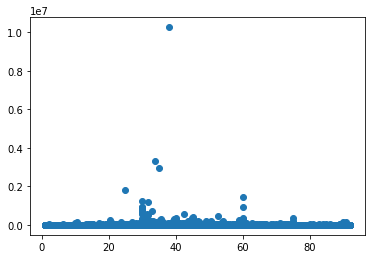

In [88]:
y = new_df['pledged']
x = new_df['duration']
plt.scatter(x,y)
plt.show()

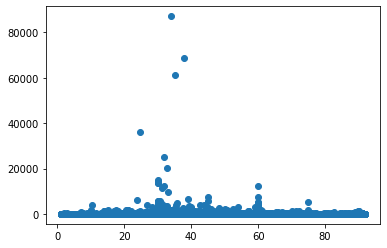

In [89]:
y = new_df['backers']
x = new_df['duration']
plt.scatter(x,y)
plt.show()

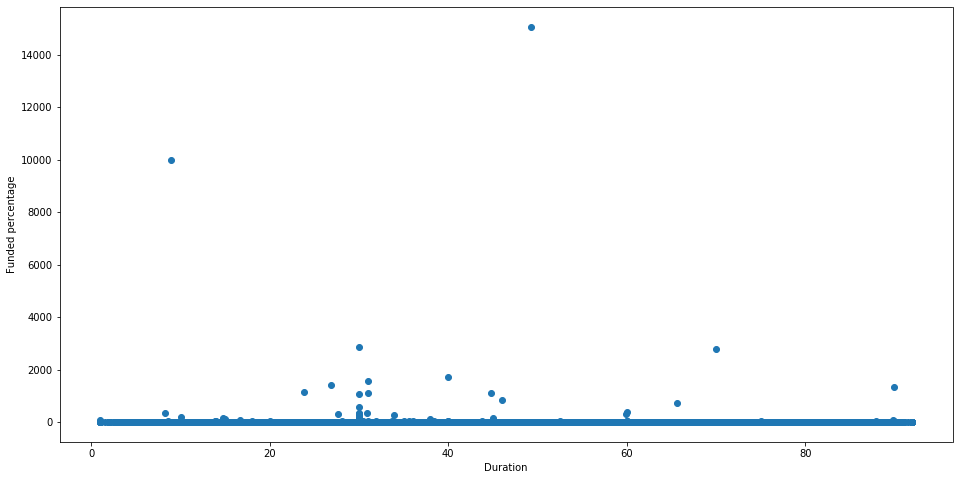

<Figure size 432x288 with 0 Axes>

In [90]:
y = new_df["funded percentage"]
x = new_df['duration']

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(x, y)
ax.set_xlabel('Duration')
ax.set_ylabel('Funded percentage')
plt.show()
plt.savefig('duration_percfunded.jpg')

In [91]:
y = new_df[['duration',"status_dummy"]].groupby('status_dummy').mean()

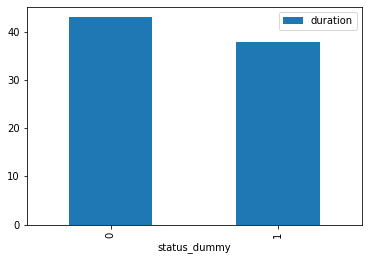

In [92]:
y.plot.bar()

## Check to see if project listing date is independent to month, day, year, and day of week
#### The Chi-Square test is a statistical hypothesis test to check independence of categorical variables. In this context, we use this test to see if projects are more or less likely to be posted in certain months, on certain days, or in particular years.

In [93]:
month_posted = new_df['project id'].groupby(new_df['month_posted_dummy']).count()
stats.chisquare(month_posted)

Power_divergenceResult(statistic=2776.5209005520896, pvalue=0.0)

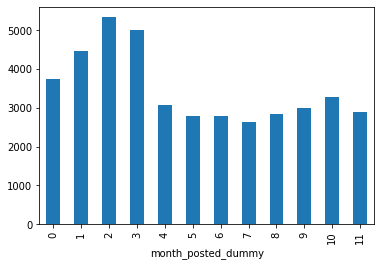

In [94]:
month_posted.plot.bar()

In [95]:
month_funded = new_df['project id'].groupby(new_df['month_funded_dummy']).count()
stats.chisquare(month_funded)

Power_divergenceResult(statistic=3348.6238617623862, pvalue=0.0)

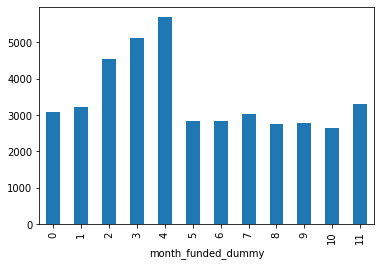

In [96]:
month_funded.plot.bar()

In [97]:
day_posted = new_df['project id'].groupby(new_df['day_posted']).count()
stats.chisquare(day_posted)

Power_divergenceResult(statistic=664.074950407495, pvalue=1.4887333283985904e-120)

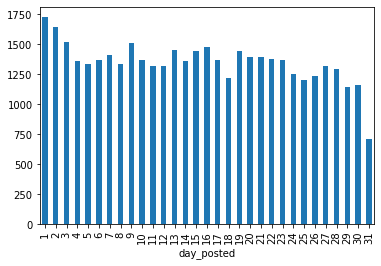

In [98]:
day_posted.plot.bar()

In [99]:
day_funded = new_df['project id'].groupby(new_df['day_funded']).count()
stats.chisquare(day_funded)

Power_divergenceResult(statistic=2642.9375492937547, pvalue=0.0)

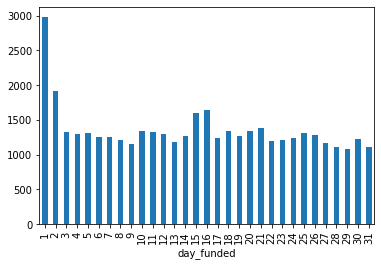

In [100]:
day_funded.plot.bar()

In [101]:
year_posted = new_df['project id'].groupby(new_df['year_posted']).count()
stats.chisquare(year_posted)

Power_divergenceResult(statistic=19780.878540187856, pvalue=0.0)

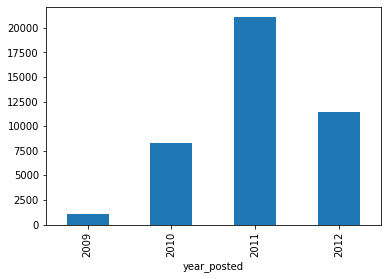

In [102]:
year_posted.plot.bar()

In [103]:
year_funded = new_df['project id'].groupby(new_df['year_funded']).count()
stats.chisquare(year_funded)

Power_divergenceResult(statistic=20089.310747831074, pvalue=0.0)

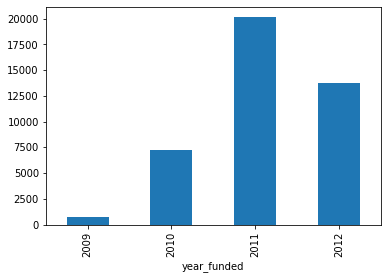

In [104]:
year_funded.plot.bar()

In [105]:
weekDay_posted = new_df['project id'].groupby(new_df['dayOfWeek_posted']).count()
stats.chisquare(weekDay_posted)

Power_divergenceResult(statistic=2879.8277765827775, pvalue=0.0)

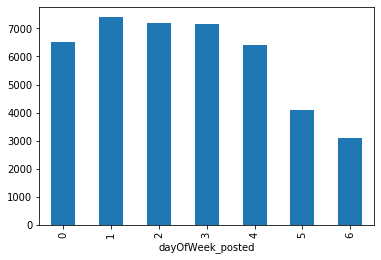

In [106]:
weekDay_posted.plot.bar()

In [107]:
weekDay_funded = new_df['project id'].groupby(new_df['dayOfWeek_funded']).count()
stats.chisquare(weekDay_funded)

Power_divergenceResult(statistic=295.2817571281757, pvalue=8.387785658465541e-61)

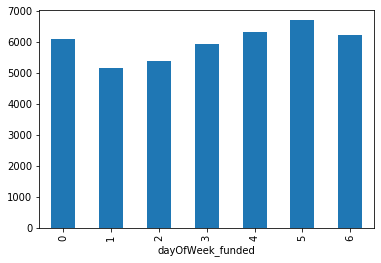

In [108]:
weekDay_funded.plot.bar()

## Check for joint significance of month, day of week, and year 
#### The F-test tests multiple hypothesis. The null hypothesis is that all slopes/coefficients are zero. Unfortunately the data isn't normally distributed so a parametric test probably isn't appropriate.
##### Month dummies: Jointly significant; Reject Null
##### Year dummies: Jointly significant; Reject Null
##### Day of week dummies: Not Jointly Significant; Do not reject the null

In [109]:
for each in ['posted', 'funded']:
    print(f'{each.capitalize()}:', stats.f_oneway(new_df['status_dummy'][new_df[f'month_{each}'] == 1], 
               new_df['status_dummy'][new_df[f'month_{each}'] == 2], 
               new_df['status_dummy'][new_df[f'month_{each}'] == 3],
              new_df['status_dummy'][new_df[f'month_{each}'] == 4],
              new_df['status_dummy'][new_df[f'month_{each}'] == 5],
              new_df['status_dummy'][new_df[f'month_{each}'] == 6],
              new_df['status_dummy'][new_df[f'month_{each}'] == 7],
              new_df['status_dummy'][new_df[f'month_{each}'] == 8],
              new_df['status_dummy'][new_df[f'month_{each}'] == 9],
              new_df['status_dummy'][new_df[f'month_{each}'] == 10],
              new_df['status_dummy'][new_df[f'month_{each}'] == 11],
              new_df['status_dummy'][new_df[f'month_{each}'] == 12]))

Posted: F_onewayResult(statistic=2.7794177318667224, pvalue=0.001290621161661944)
Funded: F_onewayResult(statistic=4.211975575580128, pvalue=2.8486971326095864e-06)


In [110]:
for each in ['posted', 'funded']:
    print(f'{each.capitalize()}:', stats.f_oneway(new_df['status_dummy'][new_df[f'year_{each}'] == 2009], 
               new_df['status_dummy'][new_df[f'year_{each}'] == 2010], 
               new_df['status_dummy'][new_df[f'year_{each}'] == 2011],
              new_df['status_dummy'][new_df[f'year_{each}'] == 2012]))

Posted: F_onewayResult(statistic=6.31445909442635, pvalue=0.0002814123156969091)
Funded: F_onewayResult(statistic=15.196937914090293, pvalue=7.012146438986875e-10)


In [111]:
for each in ['posted', 'funded']:
    print(f'{each.capitalize()}:', stats.f_oneway(new_df['status_dummy'][new_df[f'dayOfWeek_{each}'] == 0], 
               new_df['status_dummy'][new_df[f'dayOfWeek_{each}'] == 1], 
               new_df['status_dummy'][new_df[f'dayOfWeek_{each}'] == 2],
             new_df['status_dummy'][new_df[f'dayOfWeek_{each}'] == 3], 
              new_df['status_dummy'][new_df[f'dayOfWeek_{each}'] == 4],  
               new_df['status_dummy'][new_df[f'dayOfWeek_{each}'] == 5],
               new_df['status_dummy'][new_df[f'dayOfWeek_{each}'] == 6]))

Posted: F_onewayResult(statistic=7.054726074512105, pvalue=1.5977152142137403e-07)
Funded: F_onewayResult(statistic=1.4494149509388263, pvalue=0.1914102900357102)


## Kruskal-Wallis Test
#### Kruskal-Wallis test is a nonparametric version of the ANOVA test ; Interprets the MEDIAN difference

In [112]:
# compare samples
for each in ['posted', 'funded']:
 
    stat, p = kruskal(new_df['status_dummy'][new_df[f'month_{each}'] == 1], 
               new_df['status_dummy'][new_df[f'month_{each}'] == 2], 
               new_df['status_dummy'][new_df[f'month_{each}'] == 3],
              new_df['status_dummy'][new_df[f'month_{each}'] == 4],
              new_df['status_dummy'][new_df[f'month_{each}'] == 5],
              new_df['status_dummy'][new_df[f'month_{each}'] == 6],
              new_df['status_dummy'][new_df[f'month_{each}'] == 7],
              new_df['status_dummy'][new_df[f'month_{each}'] == 8],
              new_df['status_dummy'][new_df[f'month_{each}'] == 9],
              new_df['status_dummy'][new_df[f'month_{each}'] == 10],
              new_df['status_dummy'][new_df[f'month_{each}'] == 11],
              new_df['status_dummy'][new_df[f'month_{each}'] == 12])
    print(f'{each.capitalize()} Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.01
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

Posted Statistics=30.559, p=0.001
Different distributions (reject H0)
Funded Statistics=46.293, p=0.000
Different distributions (reject H0)


In [113]:
# compare samples
for each in ['posted', 'funded']:
    stat, p = kruskal(new_df['status_dummy'][new_df[f'year_{each}'] == 2009], 
                    new_df['status_dummy'][new_df[f'year_{each}'] == 2010],
                    new_df['status_dummy'][new_df[f'year_{each}'] == 2011],
                    new_df['status_dummy'][new_df[f'year_{each}'] == 2012])
    print(f'{each.capitalize()} Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.01
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

Posted Statistics=18.936, p=0.000
Different distributions (reject H0)
Funded Statistics=45.544, p=0.000
Different distributions (reject H0)


In [114]:
# compare samples
for each in ['posted', 'funded']:
    stat, p = kruskal(new_df['status_dummy'][new_df[f'dayOfWeek_{each}'] == 0], 
                   new_df['status_dummy'][new_df[f'dayOfWeek_{each}'] == 1], 
                   new_df['status_dummy'][new_df[f'dayOfWeek_{each}'] == 2],
                 new_df['status_dummy'][new_df[f'dayOfWeek_{each}'] == 3], 
                  new_df['status_dummy'][new_df[f'dayOfWeek_{each}'] == 4],  
                   new_df['status_dummy'][new_df[f'dayOfWeek_{each}'] == 5],
                   new_df['status_dummy'][new_df[f'dayOfWeek_{each}'] == 6])
    print(f'{each.capitalize()} Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.01
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

Posted Statistics=42.292, p=0.000
Different distributions (reject H0)
Funded Statistics=8.696, p=0.191
Same distributions (fail to reject H0)


## Dunn's Test
#### Dunn's test pinpoints which means are significantly different than the others
#### This section conducts the Dunn's test between 'status_dummy' and 'month', 'year', 'day of week' and 'year_month.'


In [115]:
scikit_posthocs.posthoc_dunn(new_df, val_col='status_dummy', group_col='month_posted', p_adjust='bonferroni')

,1,2,3,4,5,6,7,8,9,10,11,12
1,1.000000,0.027101,0.680131,1.0,1.000000,1.000000,1.0,1.0,1.000000,0.158743,1.000000,1.000000
2,0.027101,1.000000,1.000000,1.0,0.063191,0.202866,1.0,1.0,0.544404,1.000000,0.667578,0.126044
3,0.680131,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000
5,1.000000,0.063191,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.000000,0.276478,1.000000,1.000000
6,1.000000,0.202866,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.000000,0.672972,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000
9,1.000000,0.544404,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000
10,0.158743,1.000000,1.000000,1.0,0.276478,0.672972,1.0,1.0,1.000000,1.000000,1.000000,0.467064


In [116]:
scikit_posthocs.posthoc_dunn(new_df, val_col='status_dummy', group_col='month_funded', p_adjust='bonferroni')

,1,2,3,4,5,6,7,8,9,10,11,12
1,1.000000,1.0,0.269449,0.083151,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.228951,1.000000
2,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000
3,0.269449,1.0,1.000000,1.000000,0.023152,0.838899,0.085376,1.0,1.0,1.0,1.000000,0.005146
4,0.083151,1.0,1.000000,1.000000,0.003695,0.311561,0.023809,1.0,1.0,1.0,1.000000,0.000948
5,1.000000,1.0,0.023152,0.003695,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.034919,1.000000
6,1.000000,1.0,0.838899,0.311561,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.627222,1.000000
7,1.000000,1.0,0.085376,0.023809,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.080245,1.000000
8,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000
9,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000
10,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000


In [117]:
# 2010 and 2011 are significantly different 
# 2011 and 2012 are significantly different
scikit_posthocs.posthoc_dunn(new_df, val_col='status_dummy', group_col='year_posted', p_adjust='bonferroni')

,2009,2010,2011,2012
2009,1.0,1.000000,1.000000,1.00000
2010,1.0,1.000000,0.007564,1.00000
2011,1.0,0.007564,1.000000,0.00093
2012,1.0,1.000000,0.000930,1.00000


In [118]:
scikit_posthocs.posthoc_dunn(new_df, val_col='status_dummy', group_col='year_funded', p_adjust='bonferroni')

,2009,2010,2011,2012
2009,1.000000,1.000000,4.511020e-01,1.000000e+00
2010,1.000000,1.000000,1.095175e-03,9.969441e-01
2011,0.451102,0.001095,1.000000e+00,6.314071e-10
2012,1.000000,0.996944,6.314071e-10,1.000000e+00


In [119]:
#Sunday, Monday, and Tuesday are the best days to post a new campaign
scikit_posthocs.posthoc_dunn(new_df, val_col='status_dummy', group_col='dayOfWeek_posted', p_adjust='bonferroni')

,0,1,2,3,4,5,6
0,1.000000,1.000000,1.000000,0.628016,0.067526,0.000672,0.002054
1,1.000000,1.000000,1.000000,0.340379,0.029403,0.000233,0.000875
2,1.000000,1.000000,1.000000,1.000000,0.149575,0.001643,0.004611
3,0.628016,0.340379,1.000000,1.000000,1.000000,0.410119,0.548987
4,0.067526,0.029403,0.149575,1.000000,1.000000,1.000000,1.000000
5,0.000672,0.000233,0.001643,0.410119,1.000000,1.000000,1.000000
6,0.002054,0.000875,0.004611,0.548987,1.000000,1.000000,1.000000


In [120]:
scikit_posthocs.posthoc_dunn(new_df, val_col='status_dummy', group_col='dayOfWeek_funded', p_adjust='bonferroni')

,0,1,2,3,4,5,6
0,1.000000,0.405313,1.0,1.000000,0.864544,1.0,1.0
1,0.405313,1.000000,1.0,0.872227,1.000000,1.0,1.0
2,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0
3,1.000000,0.872227,1.0,1.000000,1.000000,1.0,1.0
4,0.864544,1.000000,1.0,1.000000,1.000000,1.0,1.0
5,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0
6,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0


In [121]:
scikit_posthocs.posthoc_dunn(new_df, val_col='status_dummy', group_col='year_month_posted', p_adjust='bonferroni')

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,...,0.310324,0.154507,0.340654,1.000000,0.074703,1.000000,0.209604,1.00000,1.000000,1.000000
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [122]:
scikit_posthocs.posthoc_dunn(new_df, val_col='status_dummy', group_col='year_month_funded', p_adjust='bonferroni')

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
1,1.0,1.000000,1.0,1.0,0.172898,1.0,1.0,1.0,1.0,0.757344,...,0.538297,0.105584,0.371606,0.373413,1.000000,1.000000,0.344977,0.725151,1.000000e+00,1.000000
2,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
3,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
4,1.0,0.172898,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,0.990802
5,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
6,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
7,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
8,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
9,1.0,0.757344,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000


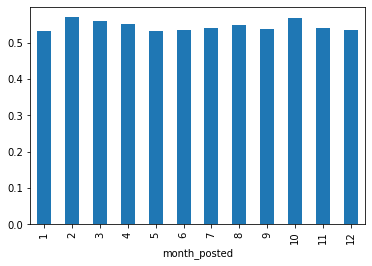

In [123]:
month_posted = new_df['status_dummy'].groupby(new_df['month_posted']).mean()
month_posted.plot.bar()

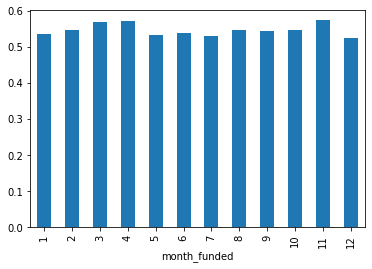

In [124]:
month_funded = new_df['status_dummy'].groupby(new_df['month_funded']).mean()
month_funded.plot.bar()

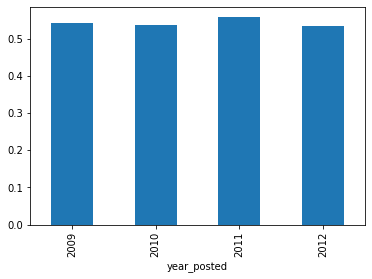

In [125]:
year_posted = new_df['status_dummy'].groupby(new_df['year_posted']).mean()
year_posted.plot.bar()

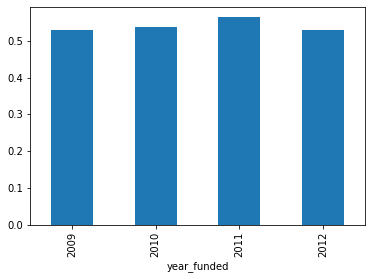

In [126]:
year_funded = new_df['status_dummy'].groupby(new_df['year_funded']).mean()
year_funded.plot.bar()

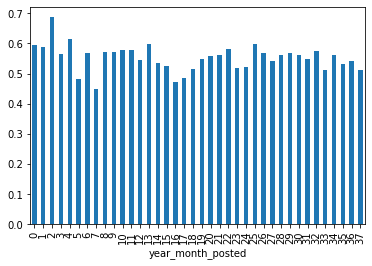

In [127]:
year_month_posted = new_df['status_dummy'].groupby(new_df['year_month_posted']).mean()
year_month_posted.plot.bar()

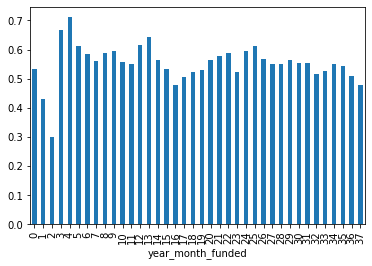

In [128]:
year_month_funded = new_df['status_dummy'].groupby(new_df['year_month_funded']).mean()
year_month_funded.plot.bar()

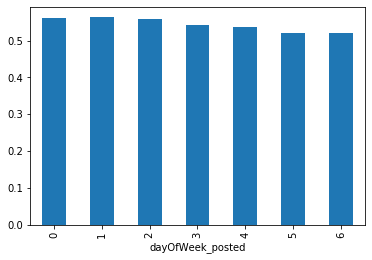

In [129]:
weekDayPosted = new_df['status_dummy'].groupby(new_df['dayOfWeek_posted']).mean()
weekDayPosted.plot.bar()

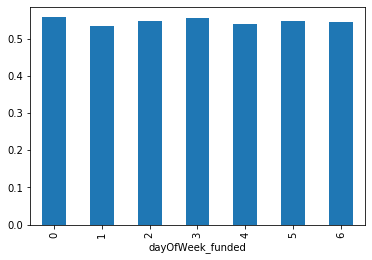

In [130]:
weekDayFunded = new_df['status_dummy'].groupby(new_df['dayOfWeek_funded']).mean()
weekDayFunded.plot.bar()

## Exploratory Analysis

In [131]:
histogram = new_df['status_dummy'].groupby(new_df['status_dummy']).count()

In [132]:
y = list(histogram.values)

In [133]:
x = list(histogram.index)

(array([18939., 22902.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

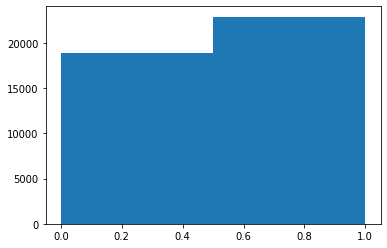

In [134]:
plt.hist(new_df['status_dummy'].T, bins=2)

## Conduct Logistic Regression

In [135]:
new_df.columns

Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration', 'duration_td', 'Posting_Date', 'year_funded',
       'month_funded', 'day_funded', 'time_funded', 'dayOfWeek_funded',
       'year_posted', 'month_posted', 'day_posted', 'time_posted',
       'dayOfWeek_posted', 'city', 'state', 'country', 'category_dummy',
       'subcategory_dummy', 'status_dummy', 'year_posted_dummy',
       'year_funded_dummy', 'month_posted_dummy', 'month_funded_dummy',
       'country_dummy', 'year_month_posted', 'year_month_funded'],
      dtype='object')

In [136]:
X = new_df[['year_funded_dummy', 'year_posted_dummy', 'month_funded_dummy', 'month_posted_dummy', 
            'year_month_funded', 'year_month_posted', 'category_dummy', 'country_dummy']]
y = new_df['status_dummy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [207]:
for penalty in ['l1', 'l2', 'elasticnet', 'none']:
    for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
        try:
            clf = LogisticRegression(C=0.5, penalty=penalty, random_state=0, solver=solver, max_iter=1500).fit(X_train, y_train)
            print(f'{penalty.capitalize()} {solver.capitalize()}')
            print(f'train score: ', clf.score(X_train, y_train))
            print(f'test score:', clf.score(X_test, y_test))
            y_pred = clf.predict(X_test)
            tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
            print(f'CONFUSION MATRIX', '\ntrue positive rate: ', tp/(tp + fp),'\ntrue negative rate: ', tn/(tn+fn), 
                  '\nPercent predicted correctly: ', (tp+tn)/(tp+fp+tn+fn))
            print("--------------------------------------------------------")
        except:
            pass

L1 Liblinear
train score:  0.5747928616953474
test score: 0.5707867316700125
CONFUSION MATRIX 
true positive rate:  0.5747183979974969 
true negative rate:  0.5580736543909348 
Percent predicted correctly:  0.5707867316700125
--------------------------------------------------------
L1 Saga
train score:  0.5747291268323773
test score: 0.5705955453589523
CONFUSION MATRIX 
true positive rate:  0.5745745745745746 
true negative rate:  0.5577156743620899 
Percent predicted correctly:  0.5705955453589523
--------------------------------------------------------
L2 Newton-cg
train score:  0.5732950924155513
test score: 0.5693528343370615
CONFUSION MATRIX 
true positive rate:  0.5723934667812846 
true negative rate:  0.5586712683347713 
Percent predicted correctly:  0.5693528343370615
--------------------------------------------------------
L2 Lbfgs
train score:  0.5733269598470363
test score: 0.5693528343370615
CONFUSION MATRIX 
true positive rate:  0.5723756906077349 
true negative rate:  0.5

C:\Users\rayde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


None Newton-cg
train score:  0.5746335245379223
test score: 0.5708823248255425
CONFUSION MATRIX 
true positive rate:  0.575719173742238 
true negative rate:  0.5560311284046693 
Percent predicted correctly:  0.5708823248255425
--------------------------------------------------------


C:\Users\rayde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


None Lbfgs
train score:  0.5746335245379223
test score: 0.5708823248255425
CONFUSION MATRIX 
true positive rate:  0.575719173742238 
true negative rate:  0.5560311284046693 
Percent predicted correctly:  0.5708823248255425
--------------------------------------------------------


C:\Users\rayde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


None Sag
train score:  0.5747291268323773
test score: 0.5705955453589523
CONFUSION MATRIX 
true positive rate:  0.5754048582995951 
true negative rate:  0.5557293703558858 
Percent predicted correctly:  0.5705955453589523
--------------------------------------------------------


C:\Users\rayde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


None Saga
train score:  0.5743785850860421
test score: 0.5703087658923621
CONFUSION MATRIX 
true positive rate:  0.5750157728706624 
true negative rate:  0.5555993690851735 
Percent predicted correctly:  0.5703087658923621
--------------------------------------------------------


## Gaussian Naive Bayes
### Gaussian Naive Bayes supports continuous valued features and models each as conforming to a Gaussian (normal) distribution.

In [204]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
y_pred = gnb.predict(X_test)
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(f'CONFUSION MATRIX', '\ntrue positive rate: ', tp/(tp + fp),'\ntrue negative rate: ', tn/(tn+fn), 
        '\nPercent predicted correctly: ', (tp+tn)/(tp+fp+tn+fn))

0.5283620140216698
0.5221298155052099
CONFUSION MATRIX 
true positive rate:  0.5420606656023579 
true negative rate:  0.45211389128559104 
Percent predicted correctly:  0.5221298155052099


In [203]:
probability_of_success = len(new_df[new_df['status_dummy']==1])/len(new_df['status_dummy'])
probability_of_failure = len(new_df[new_df['status_dummy']==0])/len(new_df['status_dummy'])
gnb = GaussianNB(priors=np.array([probability_of_success, probability_of_failure]))
gnb.fit(X_train, y_train)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
y_pred = gnb.predict(X_test)
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(f'CONFUSION MATRIX', '\ntrue positive rate: ', tp/(tp + fp),'\ntrue negative rate: ', tn/(tn+fn), 
        '\nPercent predicted correctly: ', (tp+tn)/(tp+fp+tn+fn))

0.4587635436583811
0.4632444316986904
CONFUSION MATRIX 
true positive rate:  0.5745140388768899 
true negative rate:  0.45809161832366474 
Percent predicted correctly:  0.4632444316986904


In [201]:
var_smoothing = [.1, 1e-2, 1e-3, 1e-4, 0]
for each in var_smoothing:
    gnb = GaussianNB(var_smoothing=each)
    gnb.fit(X_train, y_train)
    print(f'{each} train: ', gnb.score(X_train, y_train))
    print(f'{each} test: ',gnb.score(X_test, y_test))
    y_pred = gnb.predict(X_test)
    tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
    print(f'\nCONFUSION MATRIX', '\ntrue positive rate: ', tp/(tp + fp),'\ntrue negative rate: ', tn/(tn+fn), 
            '\nPercent predicted correctly: ', (tp+tn)/(tp+fp+tn+fn))
    print('------------------------------------------')

0.1 train:  0.5486934353091141
0.1 test:  0.543351496032884
CONFUSION MATRIX 
true positive rate:  0.543351496032884 
true negative rate:  nan 
Percent predicted correctly:  0.543351496032884
------------------------------------------
0.01 train:  0.551338432122371
0.01 test:  0.5476531880317369
CONFUSION MATRIX 
true positive rate:  0.550189793336145 
true negative rate:  0.5230296827021494 
Percent predicted correctly:  0.5476531880317369
------------------------------------------
0.001 train:  0.5379541108986615
0.001 test:  0.5344613325685881
CONFUSION MATRIX 
true positive rate:  0.547859830667921 
true negative rate:  0.4762391415431783 
Percent predicted correctly:  0.5344613325685881
------------------------------------------
0.0001 train:  0.5283301465901848
0.0001 test:  0.5222254086607399
CONFUSION MATRIX 
true positive rate:  0.5421168958742633 
true negative rate:  0.4523090202848511 
Percent predicted correctly:  0.5222254086607399
----------------------------------------

C:\Users\rayde\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


## Random Forest

In [219]:
for criterion in ['gini', 'entropy']:
    for max_features in ["auto", "sqrt", "log2"]:
        for bootstrap in [True, False]:
            print(f'criterion={criterion.capitalize()} max_features={max_features.capitalize()} bootstrap={bootstrap}')
            if bootstrap==True:
                for oob_score in [True, False]:
                    print(f'oob_score={oob_score}')
                    random = RandomForestClassifier(criterion=criterion, max_features = max_features, bootstrap=bootstrap, 
                                                    oob_score=oob_score, n_jobs=-1, random_state=0, n_estimators=100)
                    random.fit(X_train, y_train)
                    print('train score', random.score(X_train, y_train))
                    print('test score', random.score(X_test, y_test))
                    y_pred = gnb.predict(X_test)
                    tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
                    print(f'\nCONFUSION MATRIX', '\ntrue positive rate: ', tp/(tp + fp),'\ntrue negative rate: ', tn/(tn+fn), 
                                    '\nPercent predicted correctly: ', (tp+tn)/(tp+fp+tn+fn))
                    print('---------------------------------------\n')
            else:
                random = RandomForestClassifier(criterion=criterion, max_features = max_features, bootstrap=bootstrap, 
                                                n_jobs=-1, random_state=0, n_estimators=100)
                random.fit(X_train, y_train)
                print('train score', random.score(X_train, y_train))
                print('test score', random.score(X_test, y_test))
                y_pred = gnb.predict(X_test)
                tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
                print(f'\nCONFUSION MATRIX', '\ntrue positive rate: ', tp/(tp + fp),'\ntrue negative rate: ', tn/(tn+fn), 
                        '\nPercent predicted correctly: ', (tp+tn)/(tp+fp+tn+fn))                
                print('---------------------------------------\n')

criterion=Gini max_features=Auto bootstrap=True
oob_score=True
train score 0.6562460165710644
test score 0.594015868463818

CONFUSION MATRIX 
true positive rate:  0.5420606656023579 
true negative rate:  0.45211389128559104 
Percent predicted correctly:  0.5221298155052099
---------------------------------------
oob_score=False
train score 0.6562460165710644
test score 0.594015868463818

CONFUSION MATRIX 
true positive rate:  0.5420606656023579 
true negative rate:  0.45211389128559104 
Percent predicted correctly:  0.5221298155052099
---------------------------------------
criterion=Gini max_features=Auto bootstrap=False
train score 0.6562778840025494
test score 0.598508746773731

CONFUSION MATRIX 
true positive rate:  0.5420606656023579 
true negative rate:  0.45211389128559104 
Percent predicted correctly:  0.5221298155052099
---------------------------------------
criterion=Gini max_features=Sqrt bootstrap=True
oob_score=True
train score 0.6562460165710644
test score 0.594015868463

## Extreme Gradient Booster

In [242]:
learning_rate = [0.1, 0.2, 0.3]
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
eval_set = [(X_test, y_test)]

for lr in learning_rate:
    for md in max_depth:
        print(f'learning_rate={lr} max_depth={md}')
        xgboost = XGBClassifier(learning_rate=lr, max_depth=md)
        xgboost.fit(X_train, y_train, eval_metric='logloss', eval_set=eval_set, 
                    early_stopping_rounds=50, verbose=False)
        print('train score: ',xgboost.score(X_train, y_train))
        print('test score: ', xgboost.score(X_test, y_test))
        print('-----------------------------')

learning_rate=0.1 max_depth=3
train score:  0.6132887189292543
test score:  0.6018545072172833
-----------------------------
learning_rate=0.1 max_depth=4
train score:  0.6210643722115997
test score:  0.605965012905076
-----------------------------
learning_rate=0.1 max_depth=5
train score:  0.6263862332695985
test score:  0.6067297581493165
-----------------------------
learning_rate=0.1 max_depth=6
train score:  0.6297004461440407
test score:  0.6044355224165949
-----------------------------
learning_rate=0.1 max_depth=7
train score:  0.629987253027406
test score:  0.6021412866838735
-----------------------------
learning_rate=0.1 max_depth=8
train score:  0.6308476736775016
test score:  0.6022368798394035
-----------------------------
learning_rate=0.1 max_depth=9
train score:  0.6345124282982791
test score:  0.6006117961953924
-----------------------------
learning_rate=0.1 max_depth=10
train score:  0.6327597195666029
test score:  0.5965968836631297
-----------------------------
l

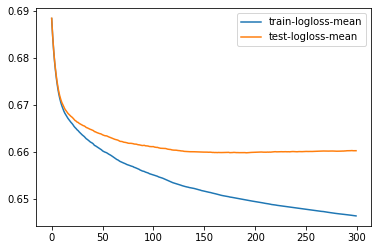

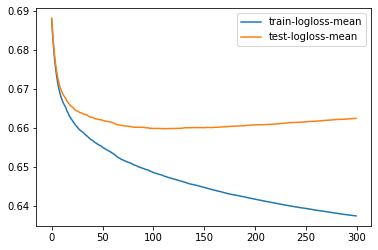

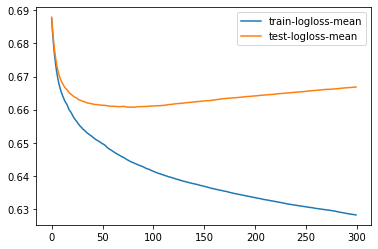

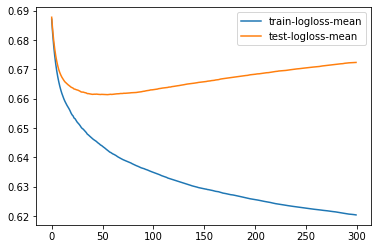

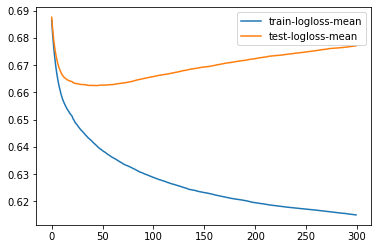

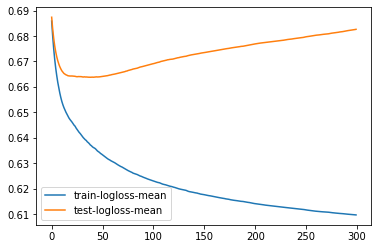

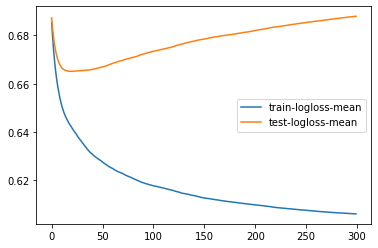

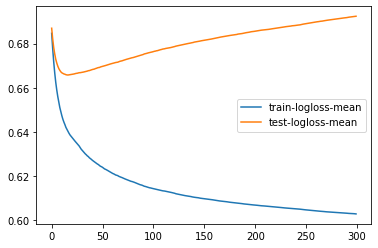

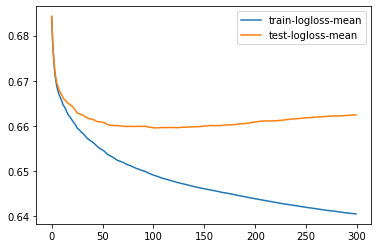

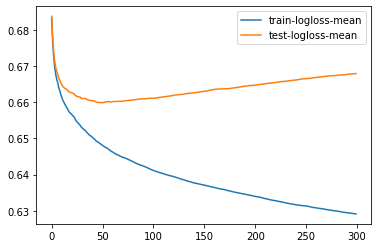

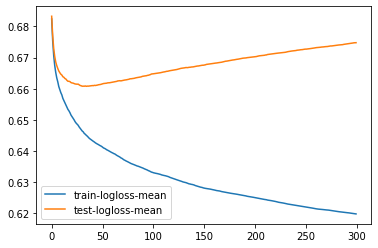

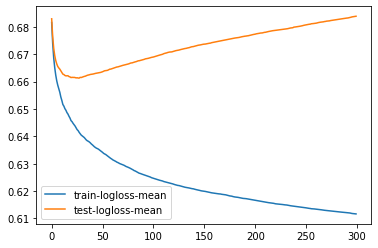

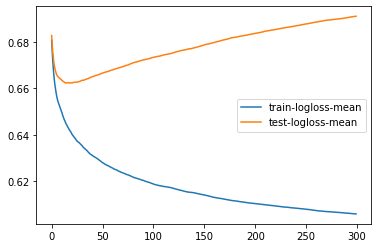

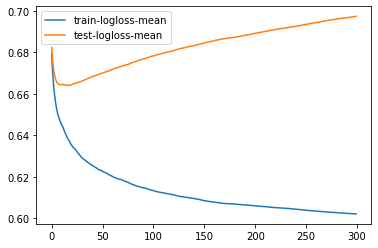

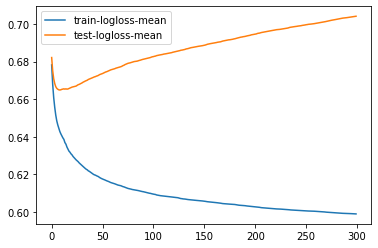

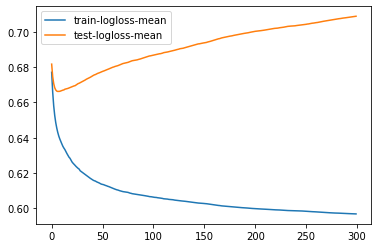

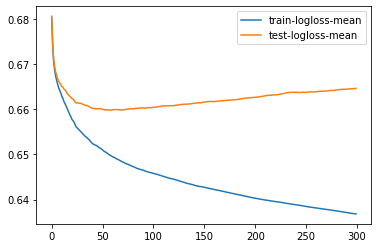

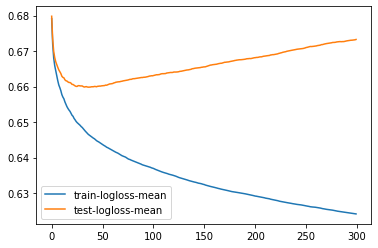

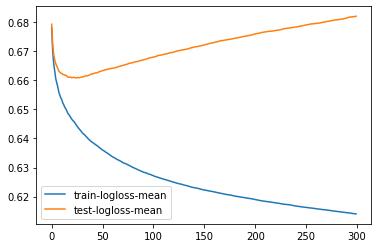

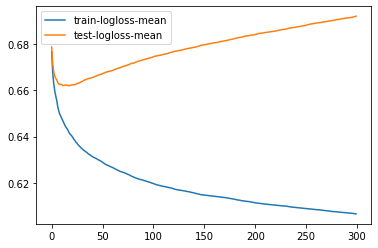

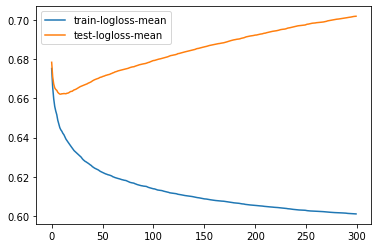

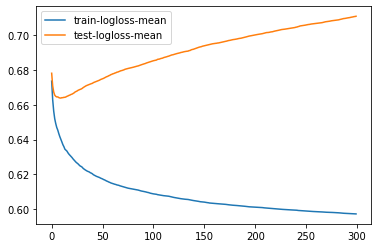

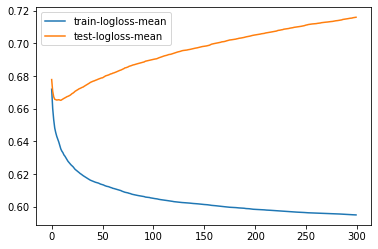

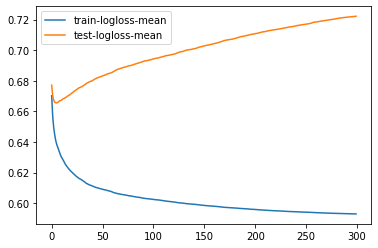

In [244]:
dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test,y_test)
eval_set = [(X_test, y_test)]
learning_rate = [0.1, 0.2, 0.3]
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
for lr in learning_rate:
    for md in max_depth:
        param = {'learning_rate':lr,'max_depth':md, 'eval_metric':'logloss',
             'objective': 'binary:logistic'}
        num_round = 300
        cv = xgb.cv(param, dtrain, num_round)
        cv[['train-logloss-mean', 'test-logloss-mean']].plot()